<a href="https://colab.research.google.com/github/sanjanagarai/Pairs-trading/blob/main/pairs_trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller
import seaborn as sns

In [ ]:
import yfinance as yf

In [ ]:
# List of Nifty 50 ticker symbols
nifty_50_symbols = [
    "ADANIPORTS.NS", "ASIANPAINT.NS", "AXISBANK.NS", "BAJAJ-AUTO.NS", "BAJFINANCE.NS", "BAJAJFINSV.NS",
    "BPCL.NS", "BHARTIARTL.NS", "BRITANNIA.NS", "CIPLA.NS", "COALINDIA.NS", "DIVISLAB.NS", "DRREDDY.NS",
    "EICHERMOT.NS", "GRASIM.NS", "HCLTECH.NS", "HDFCBANK.NS", "HDFCLIFE.NS", "HEROMOTOCO.NS", "HINDALCO.NS",
    "HINDUNILVR.NS", "ICICIBANK.NS", "ITC.NS", "IOC.NS", "INDUSINDBK.NS", "INFY.NS", "JSWSTEEL.NS", "KOTAKBANK.NS",
    "LT.NS", "M&M.NS", "MARUTI.NS", "NESTLEIND.NS", "NTPC.NS", "ONGC.NS", "POWERGRID.NS", "RELIANCE.NS", "SBILIFE.NS",
    "SHREECEM.NS", "SBIN.NS", "SUNPHARMA.NS", "TCS.NS", "TATAMOTORS.NS", "TATASTEEL.NS", "TECHM.NS", "TITAN.NS",
    "UPL.NS", "ULTRACEMCO.NS", "WIPRO.NS"
]

# Define the start and end dates
start_date = '2023-01-01'
end_date = '2023-06-30'

# Dictionary to store close prices for each stock
close_prices_dict = {}

# Fetch close prices for each stock and store them in separate lists
for symbol in nifty_50_symbols:
    try:
        data = yf.download(symbol, start=start_date, end=end_date)
        print(len(data))
        close_prices_dict[symbol] = data['Close'].tolist()
    except Exception as e:
        print(f"Failed to fetch data for {symbol}: {e}")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


121
121


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


121
121


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


121
121


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


121
121


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


121
121


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


121
121


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


121
121


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


121
121


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


121
121


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


121
121


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


121
121


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


121
121


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


121
121


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


121
121


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


121
121


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


121
121


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


121
121


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


121
121


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


121
121


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

121



[*********************100%%**********************]  1 of 1 completed


121
121


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


121
121


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


121
121


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


121
121


[*********************100%%**********************]  1 of 1 completed

121


In [ ]:
print(len(close_prices_dict['HDFCBANK.NS']))

121


In [ ]:
dates = pd.read_csv("/content/ITC.NS.csv")
dates = dates['Date']

In [ ]:
len(dates)

121

In [ ]:
data = pd.DataFrame(close_prices_dict)

In [ ]:
data.columns

Index(['ADANIPORTS.NS', 'ASIANPAINT.NS', 'AXISBANK.NS', 'BAJAJ-AUTO.NS',
       'BAJFINANCE.NS', 'BAJAJFINSV.NS', 'BPCL.NS', 'BHARTIARTL.NS',
       'BRITANNIA.NS', 'CIPLA.NS', 'COALINDIA.NS', 'DIVISLAB.NS', 'DRREDDY.NS',
       'EICHERMOT.NS', 'GRASIM.NS', 'HCLTECH.NS', 'HDFCBANK.NS', 'HDFCLIFE.NS',
       'HEROMOTOCO.NS', 'HINDALCO.NS', 'HINDUNILVR.NS', 'ICICIBANK.NS',
       'ITC.NS', 'IOC.NS', 'INDUSINDBK.NS', 'INFY.NS', 'JSWSTEEL.NS',
       'KOTAKBANK.NS', 'LT.NS', 'M&M.NS', 'MARUTI.NS', 'NESTLEIND.NS',
       'NTPC.NS', 'ONGC.NS', 'POWERGRID.NS', 'RELIANCE.NS', 'SBILIFE.NS',
       'SHREECEM.NS', 'SBIN.NS', 'SUNPHARMA.NS', 'TCS.NS', 'TATAMOTORS.NS',
       'TATASTEEL.NS', 'TECHM.NS', 'TITAN.NS', 'UPL.NS', 'ULTRACEMCO.NS',
       'WIPRO.NS'],
      dtype='object')

In [ ]:
# Concatenate the date DataFrame with the existing DataFrame
data = pd.concat([dates, data], axis=1)

In [ ]:
data.columns

Index(['Date', 'ADANIPORTS.NS', 'ASIANPAINT.NS', 'AXISBANK.NS',
       'BAJAJ-AUTO.NS', 'BAJFINANCE.NS', 'BAJAJFINSV.NS', 'BPCL.NS',
       'BHARTIARTL.NS', 'BRITANNIA.NS', 'CIPLA.NS', 'COALINDIA.NS',
       'DIVISLAB.NS', 'DRREDDY.NS', 'EICHERMOT.NS', 'GRASIM.NS', 'HCLTECH.NS',
       'HDFCBANK.NS', 'HDFCLIFE.NS', 'HEROMOTOCO.NS', 'HINDALCO.NS',
       'HINDUNILVR.NS', 'ICICIBANK.NS', 'ITC.NS', 'IOC.NS', 'INDUSINDBK.NS',
       'INFY.NS', 'JSWSTEEL.NS', 'KOTAKBANK.NS', 'LT.NS', 'M&M.NS',
       'MARUTI.NS', 'NESTLEIND.NS', 'NTPC.NS', 'ONGC.NS', 'POWERGRID.NS',
       'RELIANCE.NS', 'SBILIFE.NS', 'SHREECEM.NS', 'SBIN.NS', 'SUNPHARMA.NS',
       'TCS.NS', 'TATAMOTORS.NS', 'TATASTEEL.NS', 'TECHM.NS', 'TITAN.NS',
       'UPL.NS', 'ULTRACEMCO.NS', 'WIPRO.NS'],
      dtype='object')

In [ ]:
def find_cointegrated_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.05:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

In [ ]:
data.drop(columns = 'Date', inplace=True)

[('ADANIPORTS.NS', 'DIVISLAB.NS'), ('ASIANPAINT.NS', 'BHARTIARTL.NS'), ('ASIANPAINT.NS', 'TITAN.NS'), ('AXISBANK.NS', 'HDFCLIFE.NS'), ('BAJAJ-AUTO.NS', 'BAJAJFINSV.NS'), ('BAJAJ-AUTO.NS', 'GRASIM.NS'), ('BAJAJ-AUTO.NS', 'ICICIBANK.NS'), ('BAJFINANCE.NS', 'BRITANNIA.NS'), ('BAJFINANCE.NS', 'EICHERMOT.NS'), ('BAJFINANCE.NS', 'IOC.NS'), ('BAJFINANCE.NS', 'MARUTI.NS'), ('BAJAJFINSV.NS', 'BHARTIARTL.NS'), ('BAJAJFINSV.NS', 'BRITANNIA.NS'), ('BAJAJFINSV.NS', 'EICHERMOT.NS'), ('BAJAJFINSV.NS', 'INDUSINDBK.NS'), ('BAJAJFINSV.NS', 'MARUTI.NS'), ('BAJAJFINSV.NS', 'TITAN.NS'), ('BPCL.NS', 'GRASIM.NS'), ('BPCL.NS', 'NESTLEIND.NS'), ('BHARTIARTL.NS', 'BRITANNIA.NS'), ('BHARTIARTL.NS', 'IOC.NS'), ('BHARTIARTL.NS', 'MARUTI.NS'), ('BHARTIARTL.NS', 'TATAMOTORS.NS'), ('BHARTIARTL.NS', 'TITAN.NS'), ('COALINDIA.NS', 'ICICIBANK.NS'), ('COALINDIA.NS', 'KOTAKBANK.NS'), ('DIVISLAB.NS', 'HDFCLIFE.NS'), ('GRASIM.NS', 'ICICIBANK.NS'), ('GRASIM.NS', 'LT.NS'), ('GRASIM.NS', 'NESTLEIND.NS'), ('HEROMOTOCO.NS', 'HIND

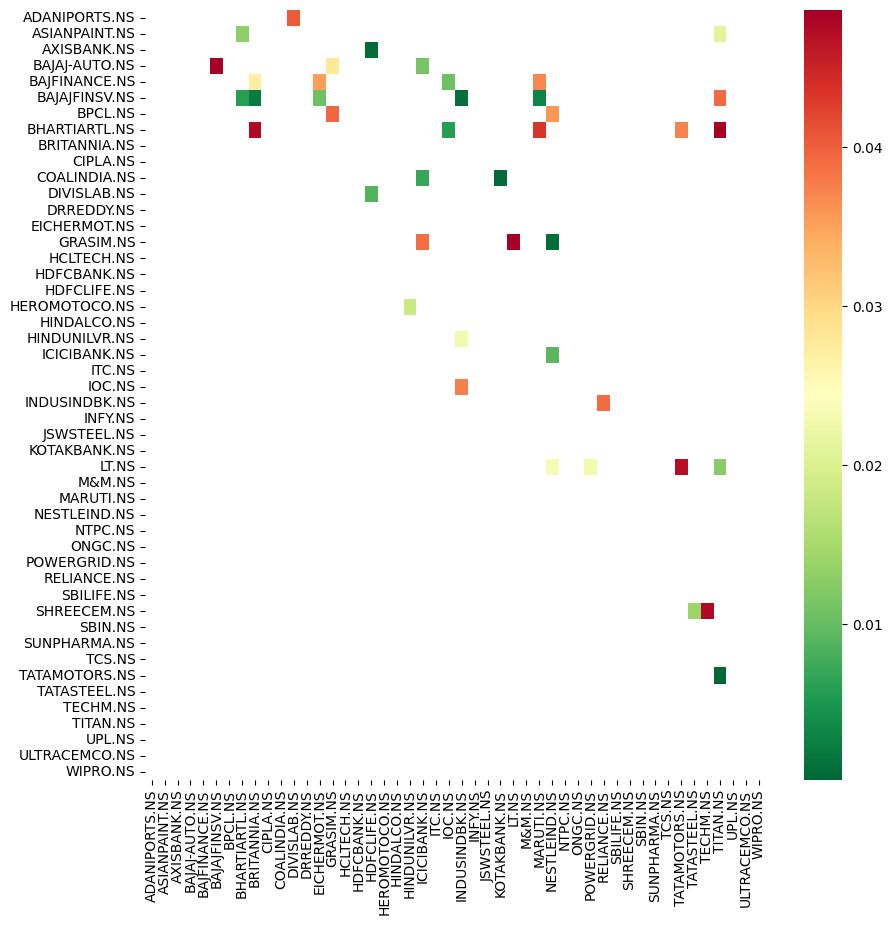

In [ ]:
# Heatmap to show the p-values of the cointegration test between each pair of
# stocks. Only show the value in the upper-diagonal of the heatmap
scores, pvalues, pairs = find_cointegrated_pairs(data)
import seaborn
fig, ax = plt.subplots(figsize=(10,10))
seaborn.heatmap(pvalues, xticklabels=data.columns, yticklabels=data.columns, cmap='RdYlGn_r'
                , mask = (pvalues >= 0.05)
                )
print(pairs)

In [ ]:
def calculate_cointegration_ratio(close_price1, close_price2):
    # Perform a cointegration test
    _, p_value, _ = coint(close_price1, close_price2)

    # Return the negative log of the p-value as the cointegration ratio
    return -np.log(p_value)

In [ ]:
cointegration = {}
for j in pairs:
  stock1 = data[j[0]]
  stock2 = data[j[1]]
  answer = calculate_cointegration_ratio(stock1.tolist(), stock2.tolist())
  name = j[0] + " " + j[1]
  cointegration[name] = answer

In [ ]:
cointegration = dict(sorted(cointegration.items(), key=lambda item: item[1], reverse=True))

In [ ]:
cointegration

{'TATAMOTORS.NS TITAN.NS': 8.575757448015574,
 'COALINDIA.NS KOTAKBANK.NS': 7.74960701087901,
 'AXISBANK.NS HDFCLIFE.NS': 7.336670179976766,
 'GRASIM.NS NESTLEIND.NS': 7.092842020994766,
 'BAJAJFINSV.NS INDUSINDBK.NS': 6.890880680746595,
 'BAJAJFINSV.NS BRITANNIA.NS': 6.125465621678612,
 'BAJAJFINSV.NS MARUTI.NS': 5.738895814470201,
 'BHARTIARTL.NS IOC.NS': 5.133025012134379,
 'BAJAJFINSV.NS BHARTIARTL.NS': 5.120635495675906,
 'COALINDIA.NS ICICIBANK.NS': 4.963948653072078,
 'DIVISLAB.NS HDFCLIFE.NS': 4.751745843862518,
 'ICICIBANK.NS NESTLEIND.NS': 4.697315550243726,
 'BAJAJFINSV.NS EICHERMOT.NS': 4.5592044218337895,
 'BAJFINANCE.NS IOC.NS': 4.554672626776284,
 'BAJAJ-AUTO.NS ICICIBANK.NS': 4.509577557721976,
 'LT.NS TITAN.NS': 4.372331263380006,
 'ASIANPAINT.NS BHARTIARTL.NS': 4.3467968849247915,
 'SHREECEM.NS TATASTEEL.NS': 4.262273135619052,
 'HEROMOTOCO.NS HINDUNILVR.NS': 3.998297328180595,
 'ASIANPAINT.NS TITAN.NS': 3.85403596115966,
 'LT.NS POWERGRID.NS': 3.7837649021132433,
 'H

In [ ]:
S1 = data['AXISBANK.NS']
S2 = data['HDFCLIFE.NS']

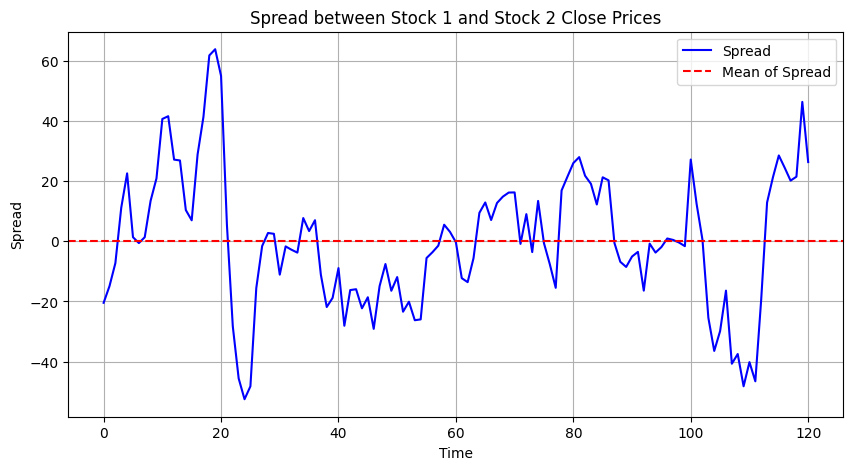

In [ ]:
# Example close prices of two stocks
close_prices_stock1 = np.array(S1)
close_prices_stock2 = np.array(S2)

# Add constant term for the intercept in the regression model
X = sm.add_constant(close_prices_stock1)

# Fit Ordinary Least Squares (OLS) regression model
model = sm.OLS(close_prices_stock2, X)
results = model.fit()

# Calculate the spread based on the residuals
spread = results.resid

# Calculate the mean of the spread
spread_mean = np.mean(spread)

# Plot the spread
plt.figure(figsize=(10, 5))
plt.plot(spread, color='blue', label='Spread')
plt.axhline(y=spread_mean, color='red', linestyle='--', label='Mean of Spread')
plt.xlabel('Time')
plt.ylabel('Spread')
plt.title('Spread between Stock 1 and Stock 2 Close Prices')
plt.legend()
plt.grid(True)
plt.show()

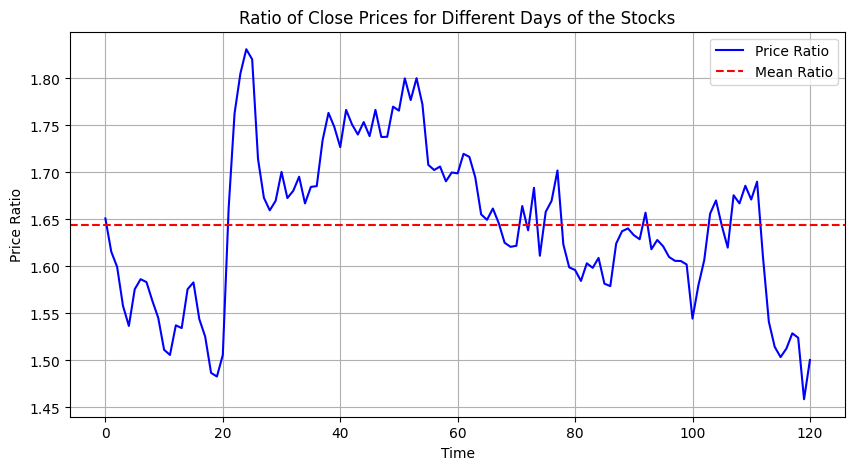

In [ ]:
# Calculate the ratio of close prices for different days
price_ratio = close_prices_stock1 / close_prices_stock2

# Calculate the mean ratio
mean_ratio = np.mean(price_ratio)

# Plot the ratio
plt.figure(figsize=(10, 5))
plt.plot(price_ratio, color='blue', label='Price Ratio')
plt.axhline(y=mean_ratio, color='red', linestyle='--', label='Mean Ratio')
plt.xlabel('Time')
plt.ylabel('Price Ratio')
plt.title('Ratio of Close Prices for Different Days of the Stocks')
plt.legend()
plt.grid(True)
plt.show()

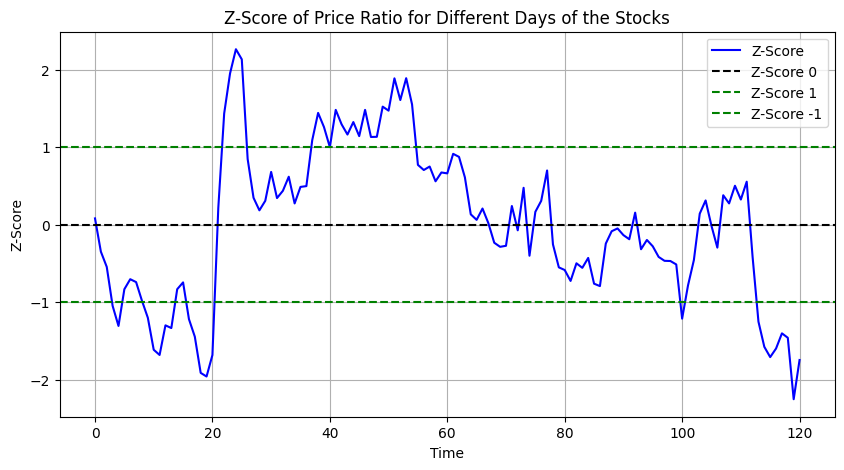

In [ ]:
# Calculate the mean and standard deviation of the price ratio
mean_ratio = np.mean(price_ratio)
std_ratio = np.std(price_ratio)

# Calculate the z-score of the price ratio
z_score = (price_ratio - mean_ratio) / std_ratio

# Plot the z-score
plt.figure(figsize=(10, 5))
plt.plot(z_score, color='blue', label='Z-Score')
plt.axhline(y=0, color='black', linestyle='--', label='Z-Score 0')
plt.axhline(y=1, color='green', linestyle='--', label='Z-Score 1')
plt.axhline(y=-1, color='green', linestyle='--', label='Z-Score -1')
plt.xlabel('Time')
plt.ylabel('Z-Score')
plt.title('Z-Score of Price Ratio for Different Days of the Stocks')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
price_ratio = S1/S2

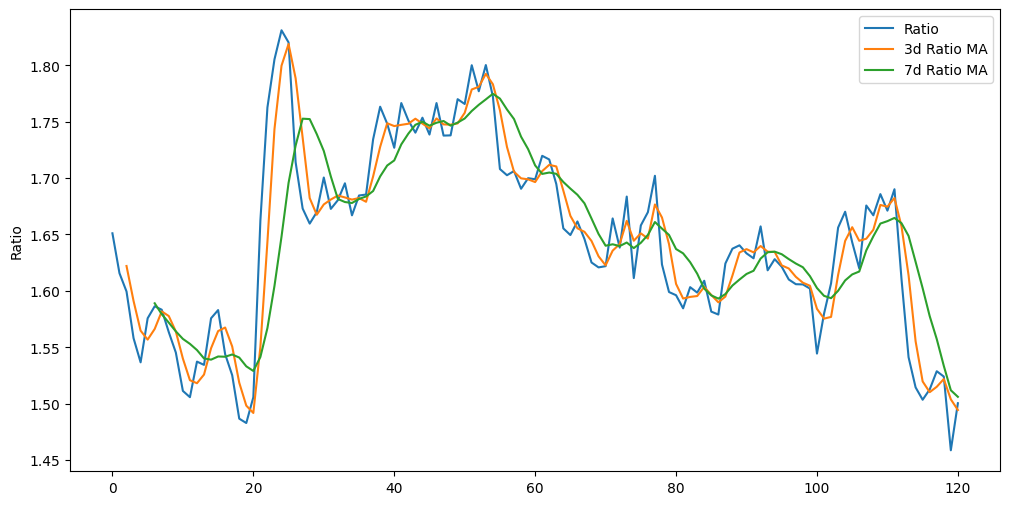

In [ ]:
ratios_mavg3 = price_ratio.rolling(window=3, center=False).mean()
ratios_mavg7 = price_ratio.rolling(window=7, center=False).mean()
std_7 = price_ratio.rolling(window=7, center=False).std()
zscore_7_3 = (ratios_mavg3 - ratios_mavg7)/std_7
plt.figure(figsize=(12, 6))
plt.plot(price_ratio.index, price_ratio.values)
plt.plot(ratios_mavg3.index, ratios_mavg3.values)
plt.plot(ratios_mavg7.index, ratios_mavg7.values)
plt.legend(['Ratio', '3d Ratio MA', '7d Ratio MA'])

plt.ylabel('Ratio')
plt.show()

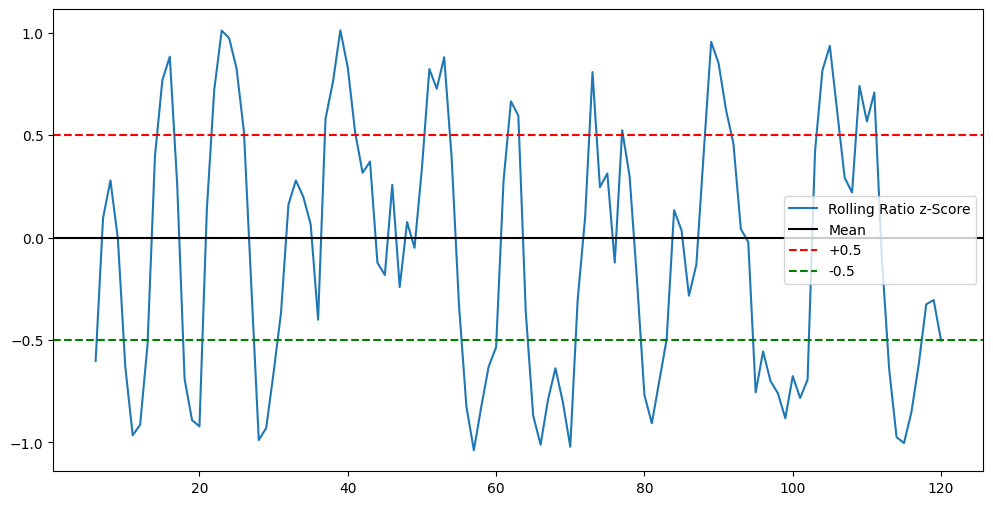

In [ ]:
# Plot the z-score
plt.figure(figsize=(12, 6))
zscore_7_3.plot()
plt.axhline(0, color='black')
plt.axhline(0.5, color='red', linestyle='--')
plt.axhline(-0.5, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-Score', 'Mean', '+0.5', '-0.5'])
plt.show()

In [ ]:
type(zscore_7_3)

pandas.core.series.Series

In [ ]:
zscore_7_3 = zscore_7_3.tolist()

In [ ]:
zscore_7_3 = zscore_7_3[6:]

In [ ]:
zscore_7_3

[-0.6024676630275013,
 0.0951228284758371,
 0.27962773584191836,
 -0.005611662030332613,
 -0.6306129479806086,
 -0.9656213105991029,
 -0.9145602308158862,
 -0.5229190727444721,
 0.39746283060211696,
 0.7684291026825263,
 0.8839074320073064,
 0.2595240935637947,
 -0.6914538587770078,
 -0.891696849565724,
 -0.9221258279677952,
 0.13995900093253583,
 0.7244472240425027,
 1.0112976111518794,
 0.9746370685064281,
 0.8275684655957609,
 0.5165291289125248,
 -0.24006260071768576,
 -0.9892030587651743,
 -0.9298586105372544,
 -0.6590519827461845,
 -0.36652026172618096,
 0.16123655908237722,
 0.27926107739027234,
 0.19963462573515028,
 0.0648669638795061,
 -0.4009665222060008,
 0.5812346644849636,
 0.7605818336767052,
 1.0129354645593,
 0.8315001243895906,
 0.5124778993911089,
 0.31667997493331496,
 0.3713504725515799,
 -0.12267173261937815,
 -0.18279271547118003,
 0.2580869925991857,
 -0.24162717614723062,
 0.07618157955043184,
 -0.04975286635201772,
 0.33946954154094355,
 0.8235817731988878,
 0

In [ ]:
buy=[0]*115
sell=[0]*115
for i in range(0, 115):
  if zscore_7_3[i]<-0.5:
      buy[i]=1
  if zscore_7_3[i]>0.5:
      sell[i]=1


In [ ]:
len(sell)

115

In [ ]:
# Convert list to DataFrame
buy = pd.Series(buy)
sell = pd.Series(sell)

In [ ]:
len(buy)

115

In [ ]:
price_ratio = price_ratio.iloc[6:]

In [ ]:
len(price_ratio)

115

In [ ]:
price_ratio = price_ratio.tolist()

In [ ]:
price_ratio = pd.Series(price_ratio)

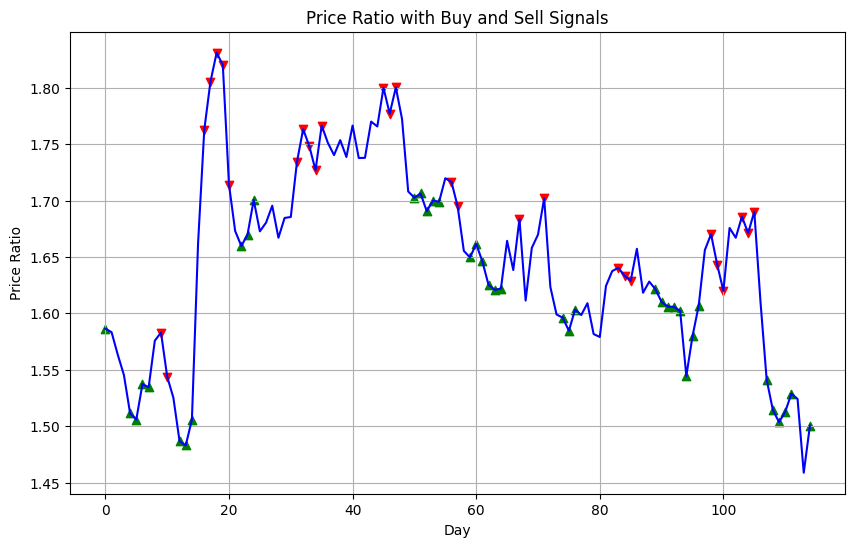

In [ ]:
# Plot price ratio as a line graph
plt.figure(figsize=(10, 6))
plt.plot(price_ratio, color='blue', label='Price Ratio')

# Plot green markers for buy signals
for i, signal in enumerate(buy):
    if signal == 1:
        plt.scatter(i, price_ratio[i], color='green', marker='^', label='Buy Signal')

# Plot red markers for sell signals
for i, signal in enumerate(sell):
    if signal == 1:
        plt.scatter(i, price_ratio[i], color='red', marker='v', label='Sell Signal')

plt.xlabel('Day')
plt.ylabel('Price Ratio')
plt.title('Price Ratio with Buy and Sell Signals')
plt.grid(True)
plt.show()

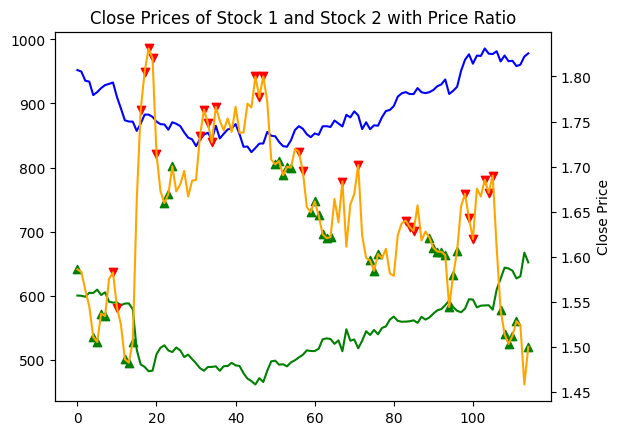

In [ ]:
# Plot S1
plt.plot(S1, label='Stock 1', color='blue')

# Plot S2
plt.plot(S2, label='Stock 2', color='green')

# Plot price_ratio on secondary y-axis
plt.twinx()  # Create a secondary y-axis
plt.plot(price_ratio, label='Price Ratio', color='orange')

# Plot green markers for buy signals
for i, signal in enumerate(buy):
    if signal == 1:
        plt.scatter(i, price_ratio[i], color='green', marker='^', label='Buy Signal')

# Plot red markers for sell signals
for i, signal in enumerate(sell):
    if signal == 1:
        plt.scatter(i, price_ratio[i], color='red', marker='v', label='Sell Signal')

# Set labels and title
plt.xlabel('Day')
plt.ylabel('Close Price')
plt.title('Close Prices of Stock 1 and Stock 2 with Price Ratio')


plt.show()

In [ ]:
S1 = S1[6:].tolist()
S2 = S2[6:].tolist()

In [ ]:
S1 = pd.Series(S1)
S2 = pd.Series(S2)

In [ ]:
len(S1)

115

In [ ]:
buy[105]

0

In [ ]:
status_S1 = [0]*115
status_S2 = [0]*115

for i, signal in enumerate(buy):
    if signal == 1:
        status_S1[i] = 1
        status_S2[i] = -1

for i, signal in enumerate(sell):
    if signal == 1:
        status_S1[i] = -1
        status_S2[i] = 1

In [ ]:
status_S1 = pd.Series(status_S1)
status_S2 = pd.Series(status_S2)

In [ ]:
S1

0      952.150024
1      949.750000
2      935.549988
3      934.150024
4      913.150024
          ...    
110    966.599976
111    958.400024
112    960.549988
113    973.250000
114    978.200012
Length: 115, dtype: float64

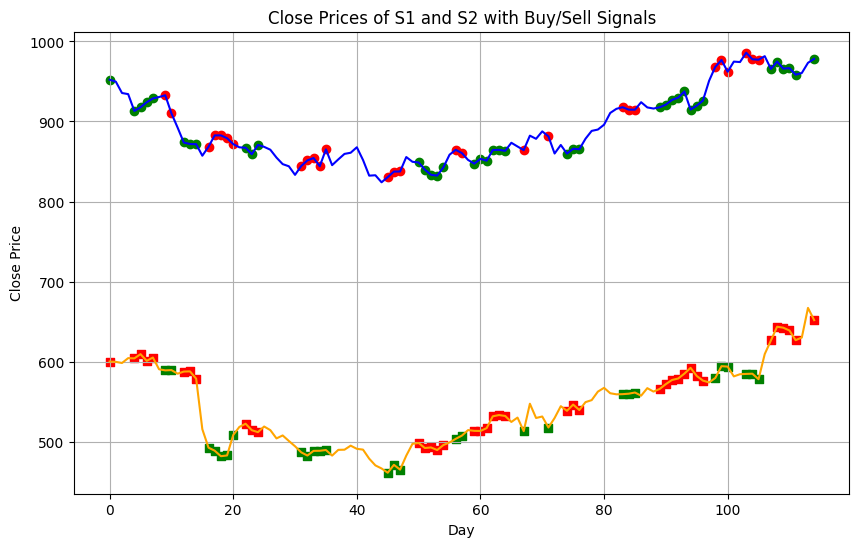

In [ ]:
# Plot S1 and S2
plt.figure(figsize=(10, 6))
plt.plot(S1, label='S1', color='blue')
plt.plot(S2, label='S2', color='orange')

# Add green markers for status 1 and red markers for status -1 on S1
for i, status in enumerate(status_S1):
    if status == 1:
        plt.scatter(i, S1[i], color='green', marker='o', label='S1 Buy Signal')
    elif status == -1:
        plt.scatter(i, S1[i], color='red', marker='o', label='S1 Sell Signal')

# Add green markers for status 1 and red markers for status -1 on S2
for i, status in enumerate(status_S2):
    if status == 1:
        plt.scatter(i, S2[i], color='green', marker='s', label='S2 Buy Signal')
    elif status == -1:
        plt.scatter(i, S2[i], color='red', marker='s', label='S2 Sell Signal')

plt.xlabel('Day')
plt.ylabel('Close Price')
plt.title('Close Prices of S1 and S2 with Buy/Sell Signals')
plt.grid(True)
plt.show()


In [ ]:
def trade(S1, S2, window1, window2):

    # If window length is 0, algorithm doesn't make sense, so exit
    if (window1 == 0) or (window2 == 0):
        return 0

    # Compute rolling mean and rolling standard deviation
    ratios = S1/S2
    ma1 = ratios.rolling(window=window1,
                               center=False).mean()
    ma2 = ratios.rolling(window=window2,
                               center=False).mean()
    std = ratios.rolling(window=window2,
                        center=False).std()
    zscore = (ma1 - ma2)/std

    # Simulate trading
    # Start with no money and no positions
    money = 0
    countS1 = 0
    countS2 = 0
    for i in range(len(ratios)):
        # If z_score is less than -0.5, go long on stock 1 and go short on stock 2
        if zscore[i] >= 0:
            countS1 += 1
            countS2 -= ratios[i]
            money += S1[i] * countS1 + S2[i] * countS2
        # If z_score is greater than 0.5, go short on stock 1 and go long on stock 2
        elif zscore[i] <= 0:
            countS1 -= 1
            countS2 += ratios[i]
            money += S1[i] * countS1 + S2[i] * countS2
        # If absolute value of z_score is less than 0.5, exit positions
        elif abs(zscore[i]) < 0.5:
            money += S1[i] * countS1 + S2[i] * countS2
            countS1 = 0
            countS2 = 0

    return money


In [ ]:
trade(data['AXISBANK.NS'], data['HDFCLIFE.NS'], 7, 3)

120050.34119472557

In [ ]:
def trade_2(S1, S2, window1, window2):

    # If window length is 0, algorithm doesn't make sense, so exit
    if (window1 == 0) or (window2 == 0):
        return 0

    # Compute rolling mean and rolling standard deviation
    ratios = S1/S2
    ma1 = ratios.rolling(window=window1,
                               center=False).mean()
    ma2 = ratios.rolling(window=window2,
                               center=False).mean()
    std = ratios.rolling(window=window2,
                        center=False).std()
    zscore = (ma1 - ma2)/std

    # Simulate trading
    # Start with no money and no positions
    money = 0
    countS1 = 0
    countS2 = 0
    for i in range(len(ratios)):
        # If z_score is less than -0.5, go long on stock 1 and go short on stock 2
        if zscore[i] >= -0.5:
            countS1 += 1
            countS2 -= ratios[i]
            money += S1[i] * countS1 + S2[i] * countS2
        # If z_score is greater than 0.5, go short on stock 1 and go long on stock 2
        elif zscore[i] <= 0.5:
            countS1 -= 1
            countS2 += ratios[i]
            money += S1[i] * countS1 + S2[i] * countS2
        # If absolute value of z_score is less than 0.5, exit positions
        elif abs(zscore[i]) < 0.5:
            money += S1[i] * countS1 + S2[i] * countS2
            countS1 = 0
            countS2 = 0

    return money

In [ ]:
trade_2(data['TATAMOTORS.NS'], data['TITAN.NS'], 7, 3)

70887.23089457449

In [ ]:
trade_2(data['COALINDIA.NS'], data['KOTAKBANK.NS'], 7, 3)

22400.805267045318

In [ ]:
def trade_3(S1, S2, window1, window2):

    # If window length is 0, algorithm doesn't make sense, so exit
    if (window1 == 0) or (window2 == 0):
        return 0

    # Compute rolling mean and rolling standard deviation
    ratios = S1/S2
    ma1 = ratios.rolling(window=window1,
                               center=False).mean()
    ma2 = ratios.rolling(window=window2,
                               center=False).mean()
    std = ratios.rolling(window=window2,
                        center=False).std()
    zscore = (ma1 - ma2)/std

    # Simulate trading
    # Start with no money and no positions
    money = 0
    countS1 = 0
    countS2 = 0
    for i in range(len(ratios)):
        # If z_score is less than -0.5, go long on stock 1 and go short on stock 2
        if zscore[i] >= 0.5:
            countS1 += 1
            countS2 -= ratios[i]
            money += S1[i] * countS1 + S2[i] * countS2
        # If z_score is greater than 0.5, go short on stock 1 and go long on stock 2
        elif zscore[i] <= -0.5:
            countS1 -= 1
            countS2 += ratios[i]
            money += S1[i] * countS1 + S2[i] * countS2
        # If absolute value of z_score is less than 0.5, exit positions
        elif abs(zscore[i]) < 0.5:
            money += S1[i] * countS1 + S2[i] * countS2
            countS1 = 0
            countS2 = 0

    return money


In [ ]:
trade_3(data['GRASIM.NS'], data['NESTLEIND.NS'], 7, 3)

1071.0005579042079